# Visualisation des données: Faire des graphiques 101
![Matplotlib Logo](https://matplotlib.org/stable/_static/logo2.svg "Matplotlib")
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/640px-Python-logo-notext.svg.png" alt="Python Logo" style="width: 200px;"/>
<img src="http://www.dcclab.ca/wp-content/uploads/2021/12/image-1536x372.png" alt="ProgFest" style="width: 500px">

 ## Outils de graphiques avec *Python*
 Avec *Python*, on peut mentionner:
 - *Matplotlib* avec son sous-module *pyplot*
 - *Plotly*
 - *Seaborn* (qui repose sur *matplotlib*)
 
mais nous étudirons seulement *pyplot*, car c'est le plus utilisé et (selon moi) le plus simple à apprendre. Étant donné qu'il s'agit d'une introduction, nous n'irons pas dans les grand détails de *matplotlib*, ni dans l'utilisation de *seaborn* (qui n'est pas vraiment plus compliquée).

## Avant de débuter
Si vous voulez refaire les activités, s'assurer d'avoir:
- *NumPy* (`pip install numpy`)
- *matplotlib* (`pip install matplotlib`)
- *tifffile* (`pip install tifffile`)
- *Pandas* (`pip install pandas`)

## Plan de la présentation (après mise en contexte)
1. Lecture de fichiers
    - Fichiers de données de type texte
    - Images
2. Afficher les données
    - Nuage de points
    - Points reliés
    - Histogramme
    - Image
3. Modifier les graphiques
    - Modifier les couleurs et autres éléments visuels
    - Ajouter une légende
    - Modifier les titres d'axes
4. Un pas plus loin
    - Plusieurs graphiques dans un
    - *subplots*
    - Graphiques 3D

## Lecture de fichiers
### Fichiers de données de type texte
Il existe principalement deux types de formats de fichiers:
1. Ceux qu'on peut lire (ex: CSV, XML, JSON, ...)
2. Ceux qu'on ne peut pas lire (ex: HDF5, PNG, fichier binaire, ...)

On aime beaucoup les fichiers CSV[^1], notamment grâce à leur simplicité. La plupart des fichiers textes se lisent assez facilement (on peut nous-mêmes faire l'algorithme de lecture, car on peut les comprendre simplement en lisant le fichier)

Alors que les autres formats... sont plus complexes. Il faut souvent "decrypter" les caractères utilisés, convertir en données qu'on peut comprendre. C'est pourquoi il faut privilégier des modules qui le font à notre place.

[^1]: Par contre, on peut privilégier un JSON si c'est dans notre besoin!

Pour lire un fichier texte, on peut utiliser notamment *NumPy* ou *Pandas*. Dans notre cas, on va utiliser *Pandas*, mais pas trop entrer dans les détails, car cela nous prendrait encore beaucoup de temps, pratiquement une période allouée à ce module. On va simplement se concentrer sur `read_csv` qui nous permet de lire des fichiers CSV. Dans notre cas, on a simplement besoin de spécifier le chemin. Attention, si, par exemple, pas d'en-tête, s'occuper de ce cas particulier pour ne pas perdre de données

In [1]:
import pandas as pd # On importe pandas, sinon on ne peut rien faire!
import numpy as np
import tifffile
import matplotlib.pyplot as plt

data_oscillateur = pd.read_csv("..\data\oscillateur_harmonique.csv") # Tous les autres arguments sont corrects par défaut

print(data_oscillateur) # Voir de quoi ça à l'air!

            t          x         x'
0      0.0000   0.000000  10.000000
1      0.1001   0.999896   9.996875
2      0.2002   1.999167   9.987503
3      0.3003   2.997188   9.971888
4      0.4004   3.993337   9.950042
..        ...        ...        ...
995   99.5996 -10.195885   9.669682
996   99.6997  -9.225831   9.730378
997   99.7998  -8.250012   9.784993
998   99.8999  -7.269037   9.833492
999  100.0000  -6.283518   9.875846

[1000 rows x 3 columns]


Maintenant, on sait comment lire un fichier CSV. Si on veut lire un JSON? On peut aussi passer par *Pandas* avec `read_json`. On peut même lire des fichiers Excel, html, xml, hdf, etc. *Pandas* est vraiment utile.

### Fichiers de type image
*Pandas* ne peut (malheureusement ou pas) pas lire des fichiers d'image. Par contre, il existe plein d'autres modules qui peuvent nous aider dans cette tâche. Tout dépend par contre du format de l'image. Les plus utilisés, PNG et JPEG, peuvent être lus directement avec *matplotlib* avec `pyplot.imread`, mais si on a un format plus *exotique*, je préfère utiliser un module qui est fait seulement pour le format. Par exemple, j'utilise *tifffile* pour lire les fichiers TIFF, fichiers souvent utilisé pour garder des images sans (ou avec) compression de grande qualité. Voyons donc comment lire deux images différentes: un PNG et un TIFF.

Nous ne verrons pas vraiment les arguments supplémentaires, car ils ne sont pas pertinents pour débuter. En fait, ils sont **très** spécifiques à des cas qu'on ne voit pas ou rarement. Il faut savoir que les deux méthodes qui seront vues retournent un *array* *NumPy* (une matrice essentiellement sur laquelle on peut faire plein d'opérations et transformations mathématiques).

In [2]:
sinus = plt.imread("../data/testSinus.png")
speckles = tifffile.imread("../data/testSpeckles.tiff")

print(sinus.shape) # On veut voir la "taille" des images
print(speckles.shape)

(1000, 1000, 4)
(1000, 1000)


## Afficher les données
### Nuage de points
Faire un nuage de points avec *matplotlib* est probablement la méthode la plus simple (bien que les points reliés sont aussi très simples, un nuage de points est très *naïf*). On a seulement besoin des coordonnées $x$ et $y$, ainsi que de la fonction `pyplot.scatter`.

In [4]:
%matplotlib notebook

temps = data_oscillateur.t # On utilise le nom des colonnes pour accéder aux données, une autre force de Pandas
position = data_oscillateur.x

plt.scatter(temps, position) # Prépare le graphique

plt.show() # Affiche le graphique

<IPython.core.display.Javascript object>

### Points reliés
On remarque que les données sont ordonnées et qu'elles seraient mieux dans un graphique à points reliés. On va donc utiliser `pyplot.plot` avec les mêmes données:

<IPython.core.display.Javascript object>


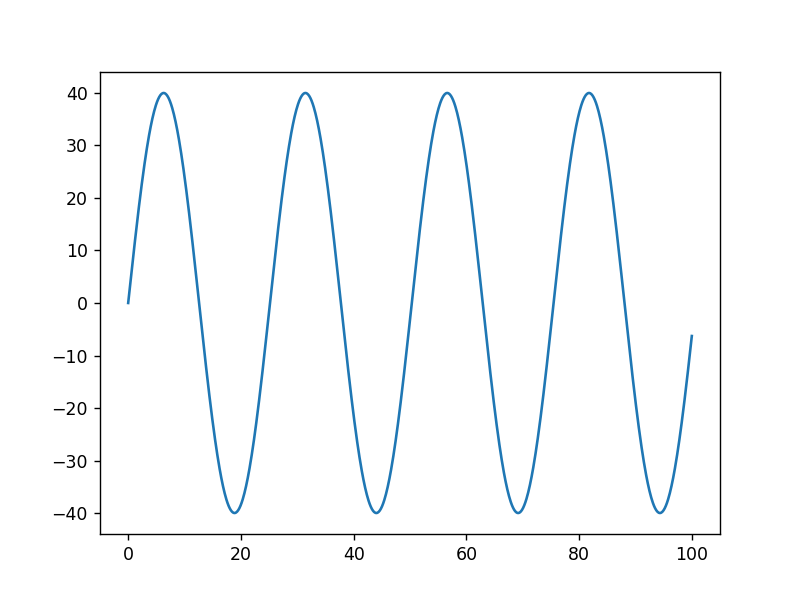

In [32]:
%matplotlib notebook
plt.plot(temps, position)

plt.show()

On remarque qu'on a simplement une ligne "continue", sans marqueurs pour les points comme on  avait avant. On verra plus tard comment ajouter des marqueurs dans un graphique de points reliés.


### Histogramme
Un histogramme est un outils de visualisation très utile lorsqu'on étudie les probabilités et statistiques. On peut notamment évaluer visuellement quel type de loi de probabilité suit un processus quelconque, ainsi que des quantité comme la moyenne, l'écart-type, la médiane, le mode, etc. Pour voir à quoi ressemble un histogramme, nous allons charger en mémoire un autre ensemble de données. Ces données sont tirées aléatoirement d'une distribution normale (Gaussienne) et nous tenterons d'évaluer la moyenne et l'écart-type.

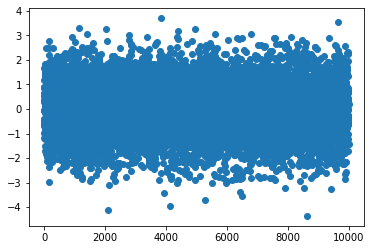

In [5]:
%matplotlib inline
data_gauss = pd.read_csv("../data/nuageGauss_big.csv")

plt.scatter(data_gauss.x, data_gauss.y)

plt.show()

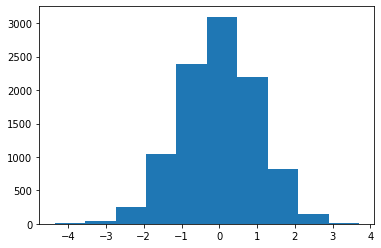

In [6]:
plt.hist(data_gauss.y)

plt.show()

Un argument important de `plt.hist` est le nombre de bins (ou les bins en général). Cet argument aide à augmenter la qualité de l'histogramme, notamment en le rendant plus précis. Un bon estimé est $\sqrt{n}$ où $n$ est le nombre de points. De plus, on peut aussi normaliser l'histogramme pour qu'il représente une densité de probabilité (l'aire sous la courbe est 1). Cet action peut donner un sens statistique à ce qu'on affiche. Voici comment procéder:

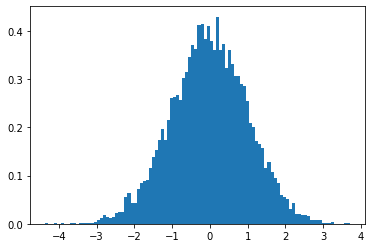

In [7]:
y = data_gauss.y
plt.hist(y, bins=int(len(y) ** 0.5), density=True)

plt.show()

### Image
On peut afficher une image (autant en nuances de gris qu'en RGBA) grâce à *matplotlib*. Ce n'est pas bien compliqué! Une fois l'image en mémoire, il ne suffit que d'utiliser `pyplot.imshow` et le tour est joué!

In [5]:
plt.imshow(sinus)

plt.show()

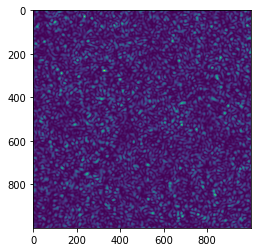

In [9]:
plt.imshow(speckles)

plt.show()

Dans le cas précédent, l'image est en nuances de gris, donc par défaut *matplotlib* lui affecte un gradient de couleur par défaut. Pour avoir l'image originale est nuances de gris (ou en autre *colormap*, il en existe plein), il faut utiliser l'argument `cmap`:

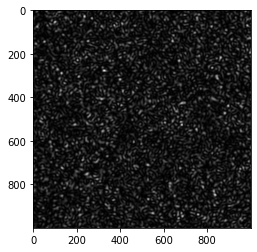

In [10]:
plt.imshow(speckles, cmap="gray")

plt.show()

## Modifier les graphiques
On peut modifier les graphiques à sa guise avec *matplotlib*, notamment en changeant les couleurs, les marqueurs, les axes et les ticks des axes. On peut même ajouter du texte! Voci comment changer la couleur de la plupart des graphiques:
- `color`: argument auquel on passe une couleur (en mot ou en hexadecimal)

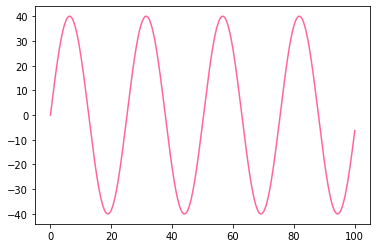

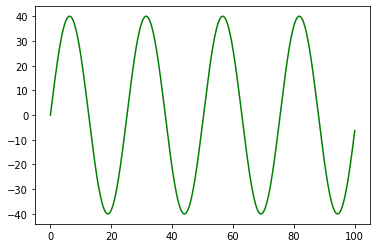

In [11]:
plt.plot(temps, position, color="#ff6699")
plt.show()
plt.plot(temps, position, color="green")
plt.show()

On a aussi parlé du fait que `scatter` affiche les marqueurs, mais que `plot` ne le fait pas. On peut arranger le problème. Par défaut `plot` ne les affiche pas, mais on peut le faire.

<IPython.core.display.Javascript object>


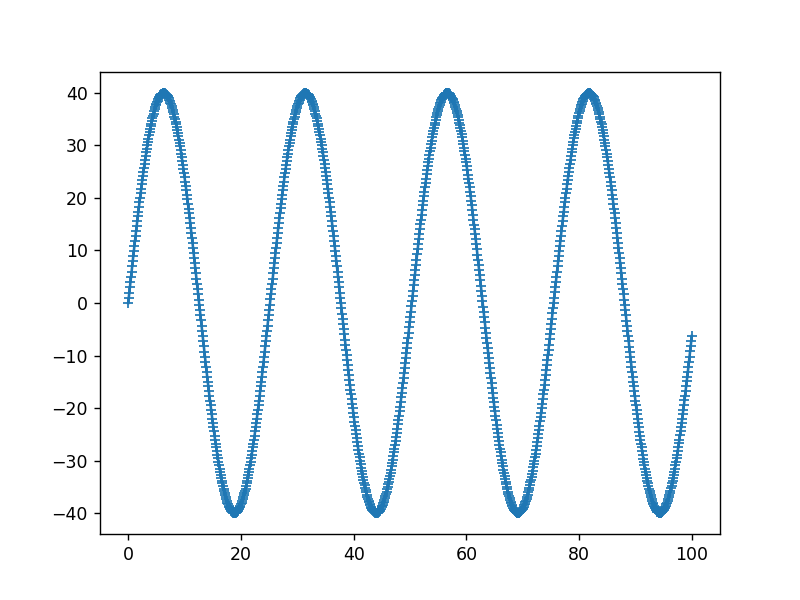

In [29]:
%matplotlib notebook
plt.plot(temps, position, marker="+")
plt.show()

Puis, on peut aussi modifier le type de ligne qui rejoint les points

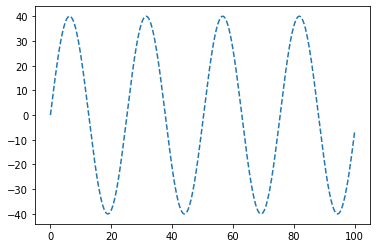

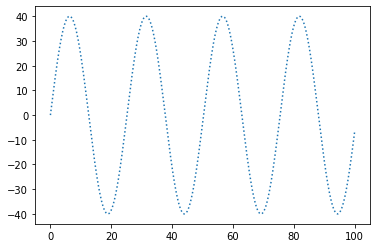

In [13]:
%matplotlib inline
plt.plot(temps, position, linestyle="--")
plt.show()
plt.plot(temps, position, linestyle="dotted")
plt.show()

On peut bien sûr mélanger les marqueurs avec différentes couleurs et différentes lignes. On peut changer la taille des marqueur avec `ms` (`plot`) ou `s` (`scatter`), l'épaisseur des lignes avec `linewidth` (ou `lw`). On peut aussi changer la transparence avec `alpha`.

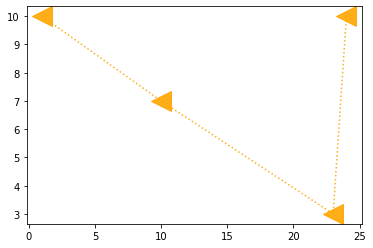

In [14]:
data_x = np.array([1,10, 23, 24])
data_y = np.array([10, 7, 3, 10])

plt.plot(data_x, data_y, linestyle=":", marker="<", color="orange", ms=20, alpha=0.9)
plt.show()

À noter que `color` fonctionne aussi pour `pyplot.hist`, mais que les autres n'ont pas vraiment de sens avec les barres (ou l'histogram en général). On peut par contre modifier l'épaisseur des barres, ou même ne pas avoir de barres:

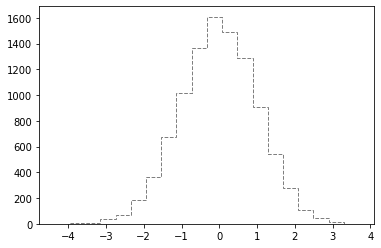

In [15]:
plt.hist(data_gauss.y, bins=20, color="black", alpha=0.5, orientation="vertical", histtype="step", linestyle="--")
plt.show()

### Ajouter une légende
Une légende est souvent très utile lorsqu'on fait un graphique, surtout lorsqu'on a plusieurs courbes sur un même graphique. On a premièrement besoin de donner un *label* à nos courbes (i.e. donner `label=<...>` en argument à `plot`, `imshow`, etc. Puis, on doit ajouter `plt.legend()` pour afficher la légende, sinon elle ne sera pas là.

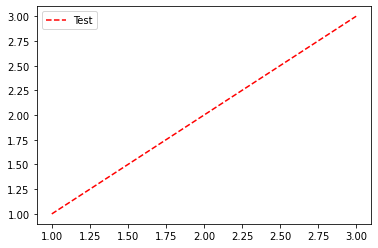

In [16]:
plt.plot([1,2,3], [1,2,3], label="Test", color="red", linestyle="--")
plt.legend()
plt.show()

### Modifier les titres d'axes
Jusqu'à maintenant, on ne s'est pas occupé des titres d'axes. En fait, par défaut il n'y en a pas qui sont affichés. Voici donc comment les ajouter:

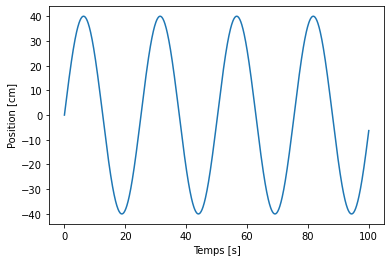

In [17]:
plt.plot(temps, position)
plt.xlabel("Temps [s]")
plt.ylabel("Position [cm]")
plt.show()

Il est à noter que *matplotlib* peut comprendre LaTeX (jusqu'à un certain point) pour ce qui est du texte en général. Par exemple:

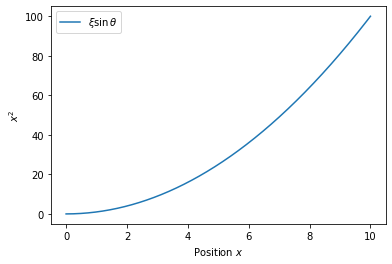

In [18]:
x = np.linspace(0, 10, 1000)
plt.plot(x, x**2, label=r"$\xi\sin\theta$")
plt.xlabel("Position $x$")
plt.ylabel("$x^2$")
plt.legend()
plt.show()

## Un pas plus loin
### Plusieurs courbes sur un même graphique
On a vu jusqu'à maintenant comment afficher une courbe et la modifier esthétiquement. Maintenant, voyons comment on peut en faire plusieurs sur un même graphique. C'est assez simple:

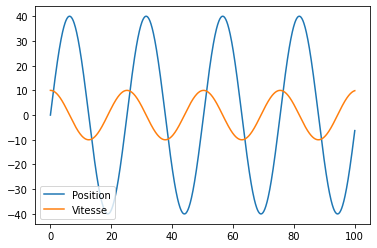

In [19]:
vitesse = data_oscillateur.get("x'")

plt.plot(temps, position, label="Position")
plt.plot(temps, vitesse, label="Vitesse")

plt.legend()
plt.show()

Il faut toutefois faire parfois attention à l'ordre d'affichage, aussi appelé le *z order*. On peut décider de cet ordre de deux manière:
- Ce qui est *plot* en premier apparaît en premier
- Modifier l'argument `zorder` (ordre d'apparition)

Plus quelque chose est affiché tard, plus il sera à l'avant-plan. Ex:

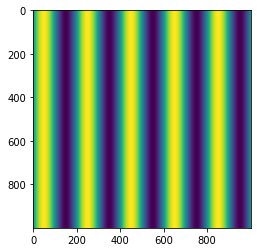

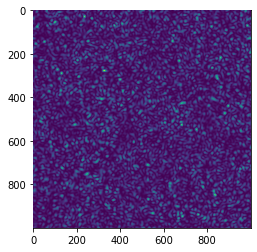

In [20]:
plt.imshow(speckles)
plt.imshow(sinus)
plt.show()
plt.imshow(speckles, zorder=10)
plt.imshow(sinus, zorder=0)
plt.show()

On peut aussi mélanger les types de graphiques, par exemple mettre une image avec un nuage de points!

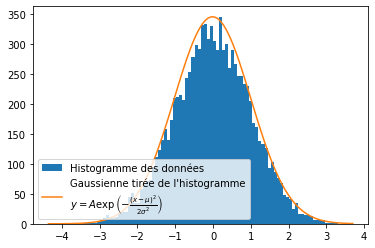

In [21]:
def gauss(x, a, mu, sigma):
    return a * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

n, bins, _ = plt.hist(data_gauss.y, bins=int(len(data_gauss.y) ** .5), label="Histogramme des données")

x_s = np.linspace(min(data_gauss.y), max(data_gauss.y), 100)
amplitude = max(n)
moyenne = np.mean(data_gauss.y)
ecartType = np.std(data_gauss.y)
y_s = gauss(x_s, amplitude, moyenne, ecartType)

plt.plot(x_s, y_s, label="Gaussienne tirée de l'histogramme\n$y = A\\exp\\left(-\\frac{(x-\\mu)^2}{2\\sigma^2}\\right)$")
plt.legend(loc="lower left")

plt.show()


### Subplots
Les *subplots* sont essentiellement plusieurs courbes dans des graphiques différents, mais "dans la même fenêtre" d'affichage. On doit faire une petite excursion dans la nature orientée objet de *pyplot*. Il faut savoir que lorsqu'on fait `plot` et autres, on effectue une modification d'un objet d'instance `Axes`. C'est sur cet objet que s'opère les diverses méthodes de création de graphiques. De plus, il y a ce qu'on appelle la figure, qui est, comme son nom l'indique, la figure qui regroupe les différents axes. Un axe peut avoir plusieurs courbes, comme ce qu'on a fait précédemment, mais ce qui est intéressant est d'utiliser plusieurs axes. Ce n'est pas bien compliqué!

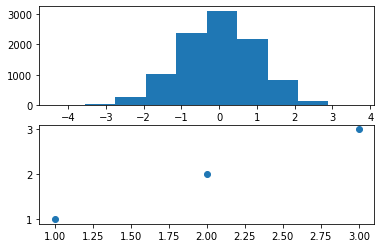

In [22]:
fig, axes = plt.subplots(2, 1) # On crée 2 axes (une figure séparée en 2 verticalement)
axes[0].hist(data_gauss.y)
axes[1].scatter([1,2,3], [1,2,3])
plt.show()

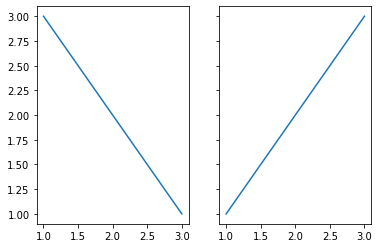

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # On crée 2 axes (une figure séparée en 2 horizontalement)

ax1.plot([1,2,3], [3,2,1])
ax2.plot([1,2,3], [1,2,3])
plt.show()

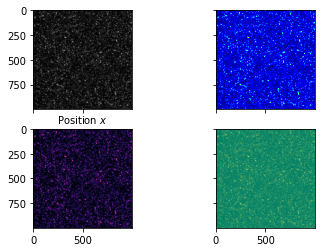

In [24]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
axes[0,0].imshow(speckles, cmap="gray")
axes[0,1].imshow(speckles, cmap="jet")
axes[1,0].imshow(speckles, cmap="inferno")
axes[1,1].imshow(speckles, cmap="summer")
axes[0,0].set_xlabel("Position $x$")
plt.show()

## Graphiques 3D
Ce ne'est pas super compliqué de faire un graphique 3D. Utilisons un autre ensemble de données:

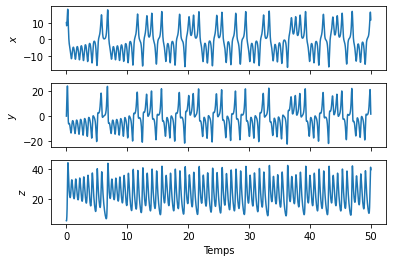

In [25]:
data_lorenz = pd.read_csv("../data/lorenz.csv")

t = data_lorenz.t
x = data_lorenz.x
y = data_lorenz.y
z = data_lorenz.z

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(t, x)
ax2.plot(t, y)
ax3.plot(t, z)
ax1.set_ylabel("$x$")
ax2.set_ylabel("$y$")
ax3.set_ylabel("$z$")
ax3.set_xlabel("Temps")
plt.show()

<IPython.core.display.Javascript object>


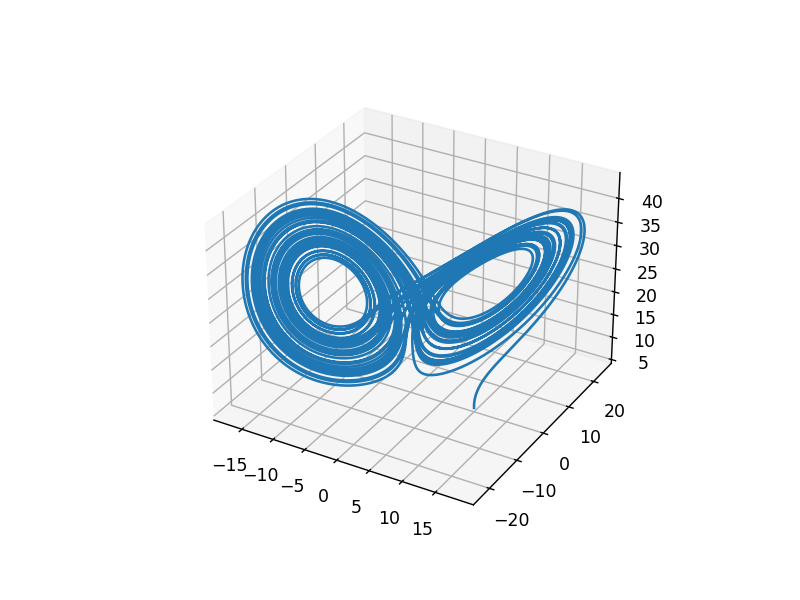

In [30]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
plt.show()

On peut faire tout plein de graphiques 3D, comme des surfaces, des formes géométriques, etc. On peut aussi mélanger les subplots, mettre du 2D avec 3D!